In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style('darkgrid')
plt.style.use('ggplot')

# Data Loading and Exploration

In [3]:
import os
print(os.path.exists(r"C:\Users\nb173419\OneDrive - Nedbank\Documents\GitHub\ExploreAI---Python-Group-Project"))

True


In [7]:
# Load the dataset
url = "Avocado_HassAvocadoBoard_20152023v1.0.1.csv"
avocado_data = pd.read_csv(url)

In [10]:
# Display the first 10 rows of the dataset
avocado_data.head(10)

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington
5,2015-01-04,1.29,19137.28,8040.64,6557.47,657.48,3881.69,3881.69,0.00,0.0,organic,BaltimoreWashington
6,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,Boise
7,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,Boise
8,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,Boston
9,2015-01-04,1.83,2192.13,8.66,939.43,0.00,1244.04,1244.04,0.00,0.0,organic,Boston


In [11]:
avocado_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          53415 non-null  object 
 1   AveragePrice  53415 non-null  float64
 2   TotalVolume   53415 non-null  float64
 3   plu4046       53415 non-null  float64
 4   plu4225       53415 non-null  float64
 5   plu4770       53415 non-null  float64
 6   TotalBags     53415 non-null  float64
 7   SmallBags     41025 non-null  float64
 8   LargeBags     41025 non-null  float64
 9   XLargeBags    41025 non-null  float64
 10  type          53415 non-null  object 
 11  region        53415 non-null  object 
dtypes: float64(9), object(3)
memory usage: 4.9+ MB


In [12]:
avocado_data.isnull().sum()

Date                0
AveragePrice        0
TotalVolume         0
plu4046             0
plu4225             0
plu4770             0
TotalBags           0
SmallBags       12390
LargeBags       12390
XLargeBags      12390
type                0
region              0
dtype: int64

In [13]:
# Check for and count duplicated rows
duplicate_count = avocado_data.duplicated().sum()
print(f"Number of duplicated rows: {duplicate_count}")

Number of duplicated rows: 0


In [14]:
# Summary statistics
avocado_data.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,53415.0,1.428910,3.931160e-01,0.44,1.119091,1.40,1.690,3.440830e+00
TotalVolume,53415.0,869447.441374,3.545274e+06,84.56,16264.655000,120352.46,454238.015,6.103446e+07
plu4046,53415.0,298270.749448,1.307669e+06,0.00,694.725000,14580.58,128792.380,2.544720e+07
plu4225,53415.0,222217.037654,9.554624e+05,0.00,2120.800000,17516.63,93515.600,2.047057e+07
plu4770,53415.0,20531.954686,1.040977e+05,0.00,0.000000,90.05,3599.735,2.860025e+06
TotalBags,53415.0,217508.289491,8.676947e+05,0.00,7846.520000,36953.10,111014.610,1.629830e+07
SmallBags,41025.0,103922.170677,5.692608e+05,0.00,0.000000,694.58,37952.980,1.256716e+07
LargeBags,41025.0,23313.164066,1.496622e+05,0.00,0.000000,0.00,2814.920,4.324231e+06
XLargeBags,41025.0,2731.811796,2.258910e+04,0.00,0.000000,0.00,0.000,6.795868e+05


In [15]:
# Identify outliers based on IQR in 'AveragePrice' column
Q1, Q3 = avocado_data['AveragePrice'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_price = avocado_data['AveragePrice'].between(lower_bound, upper_bound, inclusive='neither')

# Print the number of outliers
print(f"Number of outliers in AveragePrice: {(~outliers_price).sum()}")

Number of outliers in AveragePrice: 358


# Data Cleaning and Preprocessing

In [16]:
# Remove rows with outliers
avocado_data = avocado_data[~outliers_price]

In [17]:
# Identify rows with missing values
missing_rows = avocado_data[avocado_data[['SmallBags', 'LargeBags', 'XLargeBags']].isnull().any(axis=1)]

# Iterate over missing rows
for index, row in missing_rows.iterrows():
    # Generate random percentages that sum up to 1
    random_percentages = np.random.dirichlet(np.ones(3), size=1)[0]

    # Calculate the remaining value needed to make the sum equal to TotalBags
    remaining_value = row['TotalBags'] - row[['SmallBags', 'LargeBags', 'XLargeBags']].sum()

    # Fill missing values with random percentages
    avocado_data.at[index, 'SmallBags'] = remaining_value * random_percentages[0]
    avocado_data.at[index, 'LargeBags'] = remaining_value * random_percentages[1]
    avocado_data.at[index, 'XLargeBags'] = remaining_value * random_percentages[2]

# Verify that there are no more missing values
print(avocado_data[['TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags']].isnull().sum())

TotalBags     0
SmallBags     0
LargeBags     0
XLargeBags    0
dtype: int64


In [18]:
# This line converts the data in the columns 'plu4046', 'plu4225', and 'plu4770' to strings. This might be useful if you need to treat these values as text rather than numbers.
avocado_data[['plu4046', 'plu4225', 'plu4770']] = avocado_data[['plu4046', 'plu4225', 'plu4770']].astype(str)
# This line converts the data in the columns 'TotalBags', 'SmallBags', 'LargeBags', and 'XLargeBags' to integers
avocado_data[['TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags']] = avocado_data[['TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags']].astype(int)

<Figure size 1400x1000 with 0 Axes>

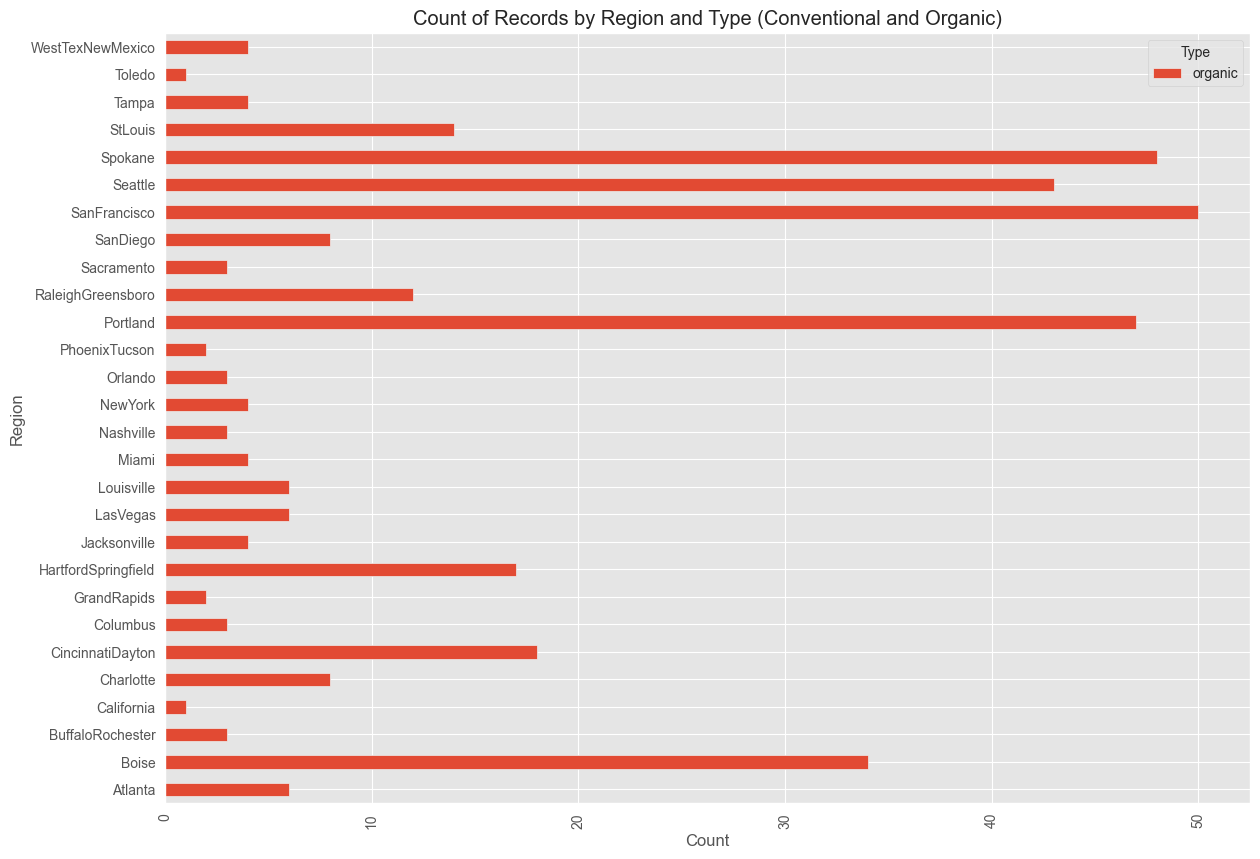

In [37]:
# Calculate the count of records by region and type
region_type_counts = avocado_data.groupby(['region', 'type']).size().unstack()

# Plotting the count of records by Region and Type
plt.figure(figsize=(14, 10))
region_type_counts.plot(kind='barh', stacked=True, figsize=(14, 10))
plt.title('Count of Records by Region and Type (Conventional and Organic)')
plt.xlabel('Count')
plt.ylabel('Region')
plt.xticks(rotation=90)
plt.legend(title='Type')
plt.show()

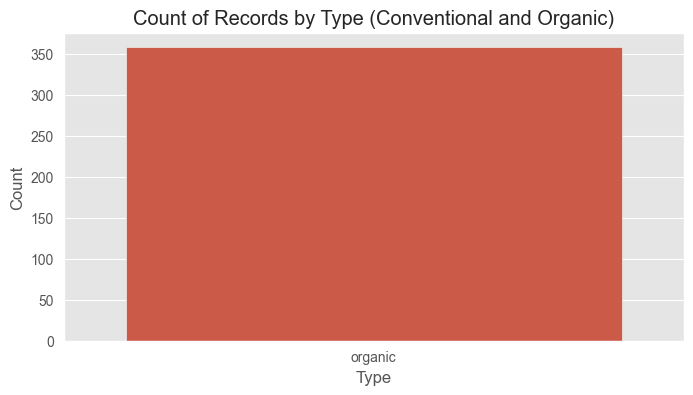

In [38]:
# Calculate the count of records by type
type_counts = avocado_data['type'].value_counts()

# Plotting the count of records by Type
plt.figure(figsize=(8, 4))
sns.countplot(x='type', data=avocado_data, order=type_counts.index)
plt.title('Count of Records by Type (Conventional and Organic)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

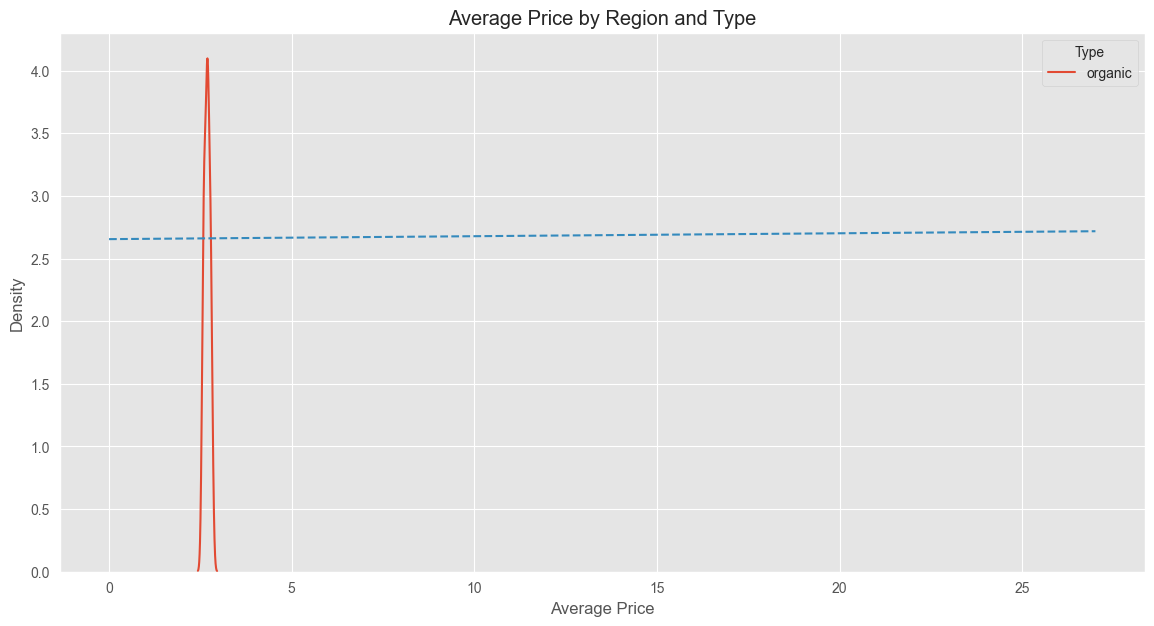

In [27]:
# Calculate the average price by region and type
avg_price_region_type = avocado_data.groupby(['region', 'type'])['AveragePrice'].mean().unstack()

# Plotting the average price by Region and Type as KDE plot with trend line
plt.figure(figsize=(14, 7))
for column in avg_price_region_type.columns:
    sns.kdeplot(avg_price_region_type[column], label=column)
    # Adding trend line
    numeric_index = range(len(avg_price_region_type.index))
    z = np.polyfit(numeric_index, avg_price_region_type[column], 1)
    p = np.poly1d(z)
    plt.plot(numeric_index, p(numeric_index), linestyle='--')

plt.title('Average Price by Region and Type')
plt.xlabel('Average Price')
plt.ylabel('Density')
plt.legend(title='Type')
plt.show()

<Figure size 2000x1000 with 0 Axes>

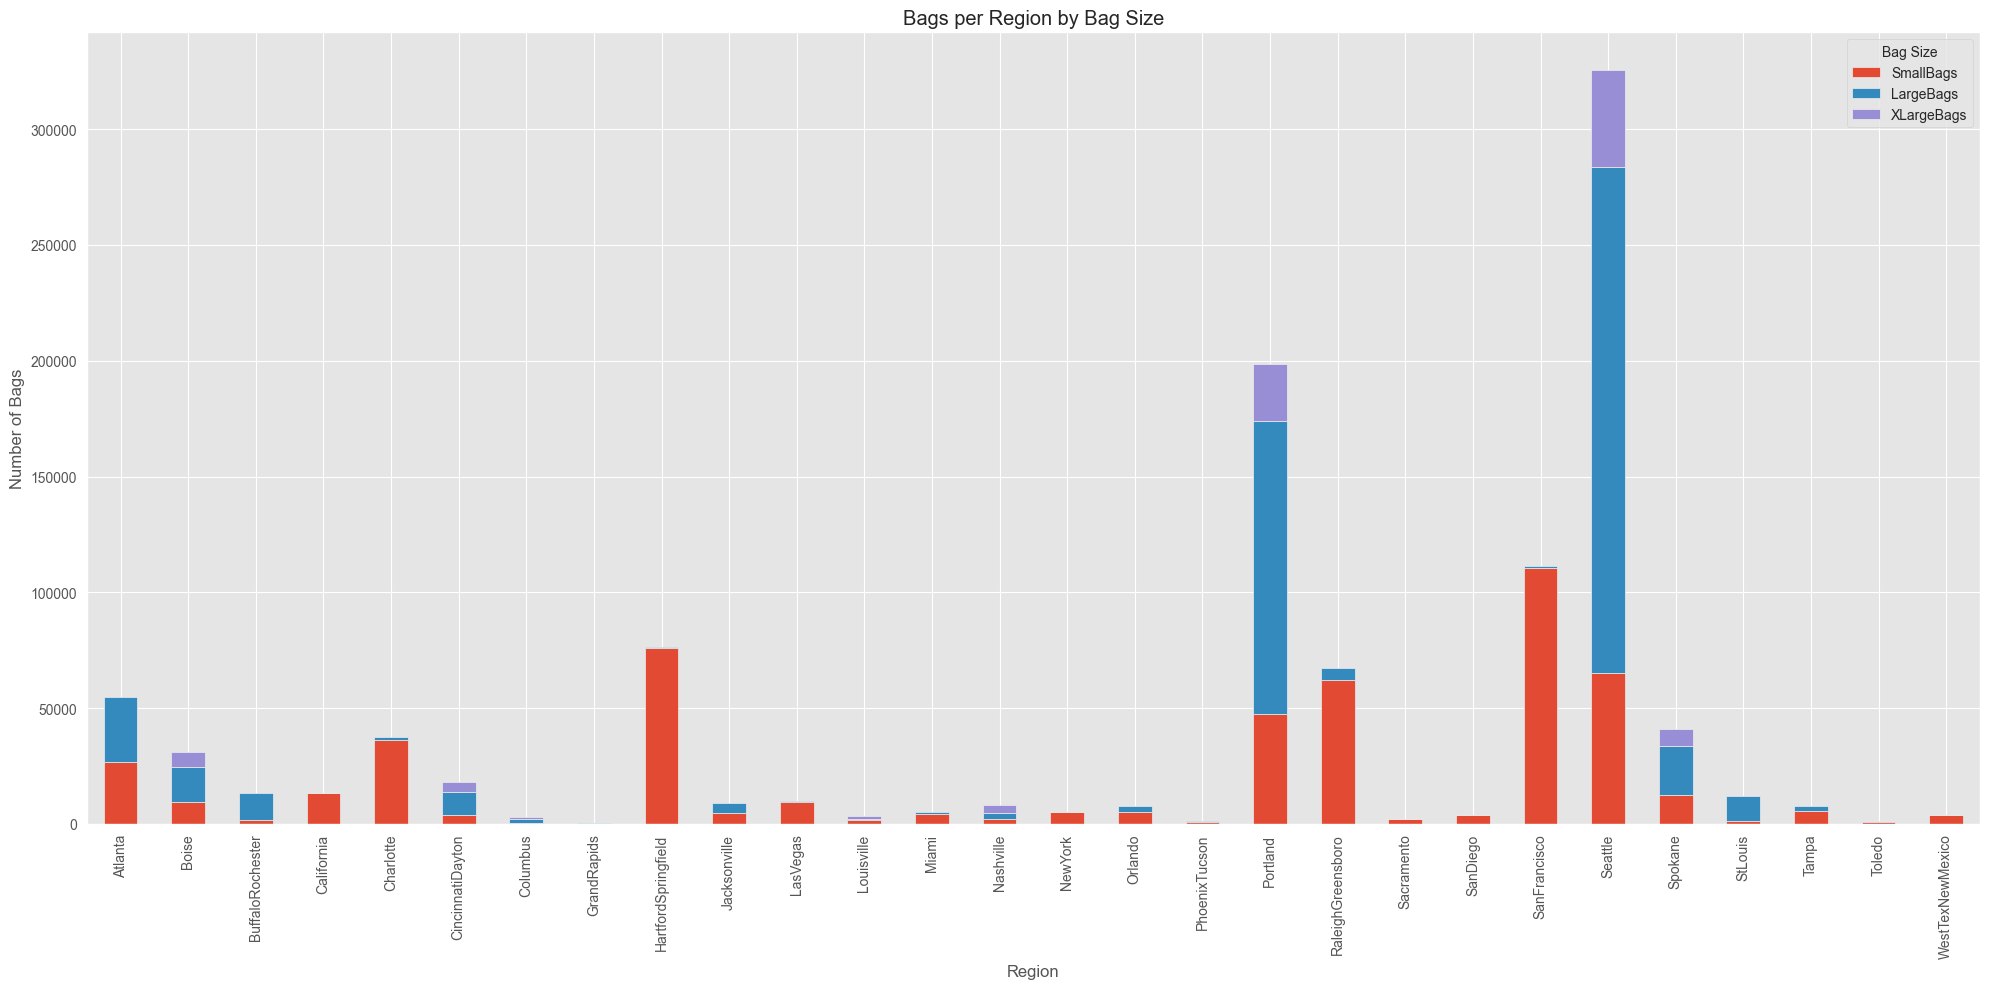

In [29]:
# Bags per region by bag size
bags_per_region = avocado_data.groupby('region')[['SmallBags', 'LargeBags', 'XLargeBags']].sum()

# Plotting the bags per region by bag size
plt.figure(figsize=(20, 10))
ax = bags_per_region.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Bags per Region by Bag Size')
plt.xlabel('Region')
plt.ylabel('Number of Bags')
plt.legend(title='Bag Size')
plt.xticks(rotation=90, ha='center')  # Align x-axis labels to the center
plt.tight_layout()
plt.show()

<Figure size 2000x1000 with 0 Axes>

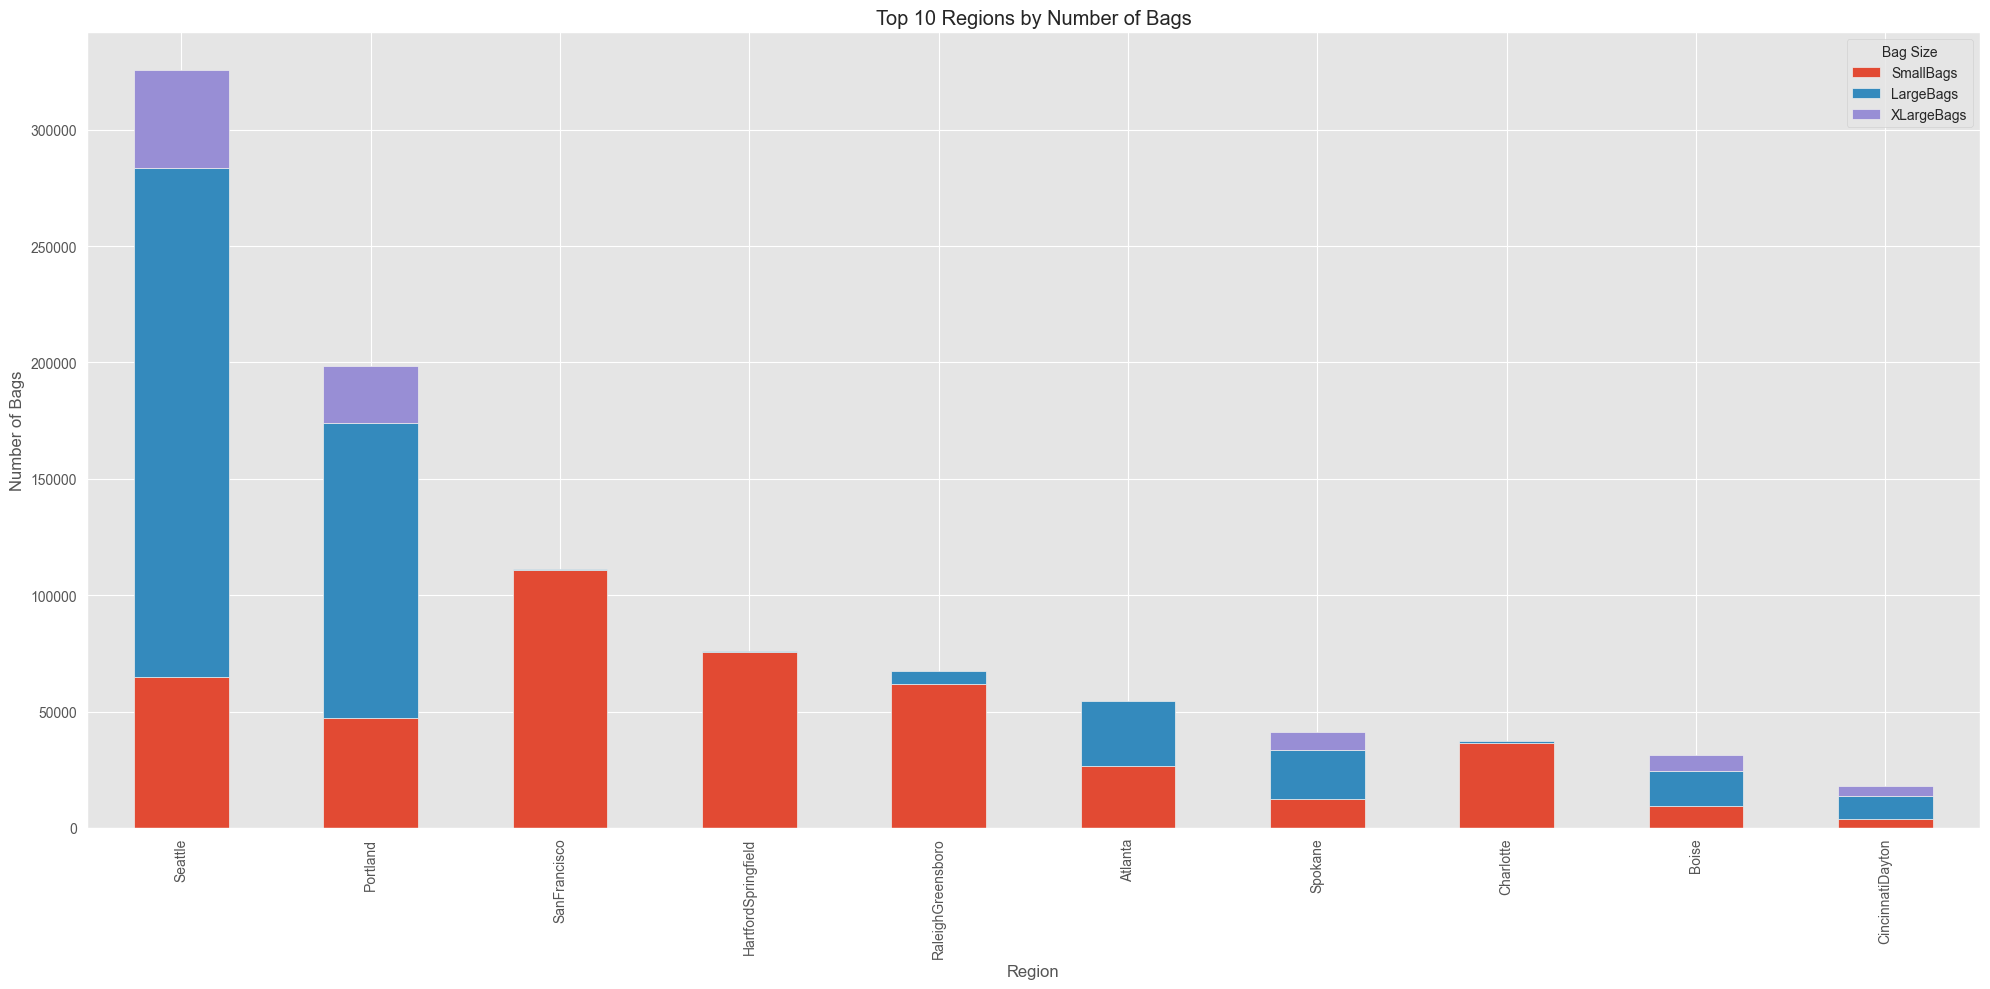

In [30]:
# Get the top 10 regions by total number of bags
bags_per_region['Total Bags'] = bags_per_region.sum(axis=1)
top_10_regions = bags_per_region.nlargest(10, 'Total Bags')

# Plotting the bags per region by bag size for top 10 regions
plt.figure(figsize=(20, 10))
ax = top_10_regions[['SmallBags', 'LargeBags', 'XLargeBags']].plot(kind='bar', stacked=True, figsize=(20, 10))

plt.title('Top 10 Regions by Number of Bags')
plt.xlabel('Region')
plt.ylabel('Number of Bags')
plt.legend(title='Bag Size')
plt.xticks(rotation=90, ha='center')  # Align x-axis labels to the center
plt.tight_layout()
plt.show()

<Figure size 2000x1000 with 0 Axes>

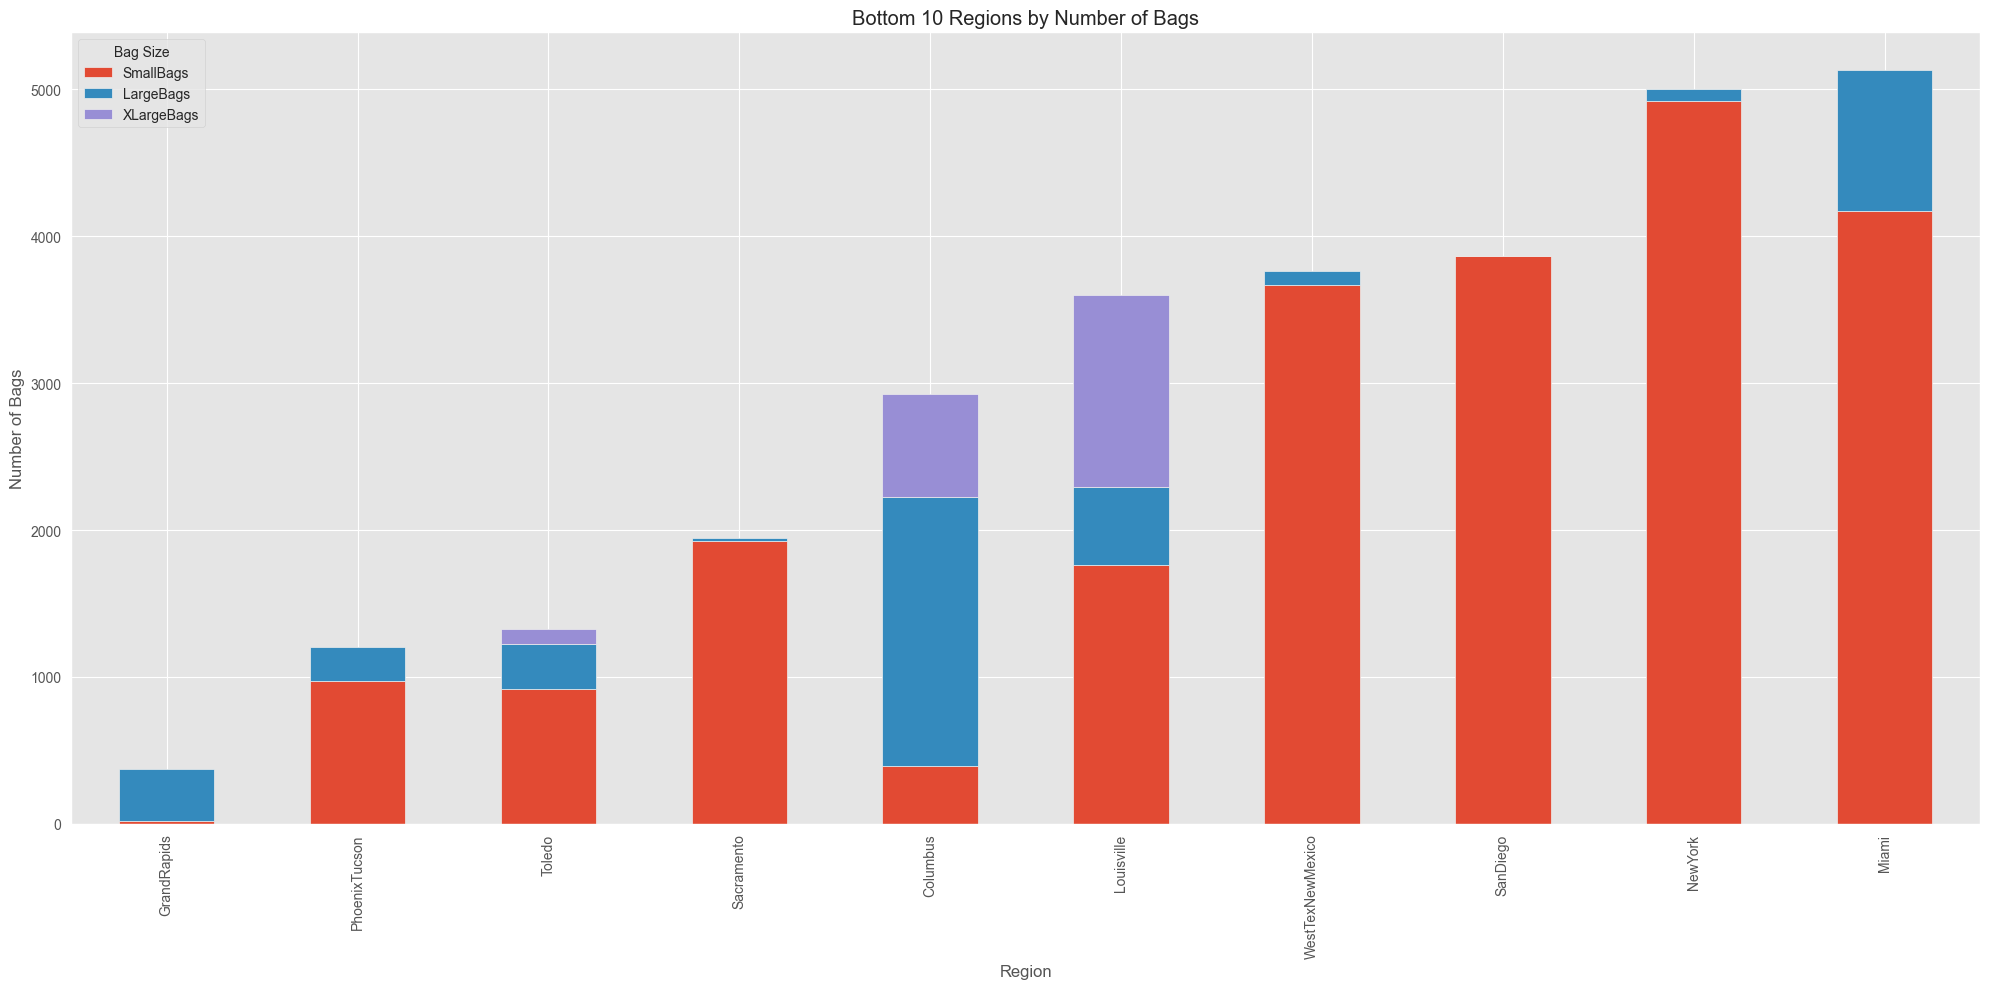

In [32]:
# Get the bottom 10 regions by total number of bags
bags_per_region['Total Bags'] = bags_per_region.sum(axis=1)
bottom_10_regions = bags_per_region.nsmallest(10, 'Total Bags')

# Plotting the bags per region by bag size for top 10 regions
plt.figure(figsize=(20, 10))
ax = bottom_10_regions[['SmallBags', 'LargeBags', 'XLargeBags']].plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Bottom 10 Regions by Number of Bags')
plt.xlabel('Region')
plt.ylabel('Number of Bags')
plt.legend(title='Bag Size')
plt.xticks(rotation=90, ha='center')  # Align x-axis labels to the center
plt.tight_layout()
plt.show()

<Figure size 2000x1000 with 0 Axes>

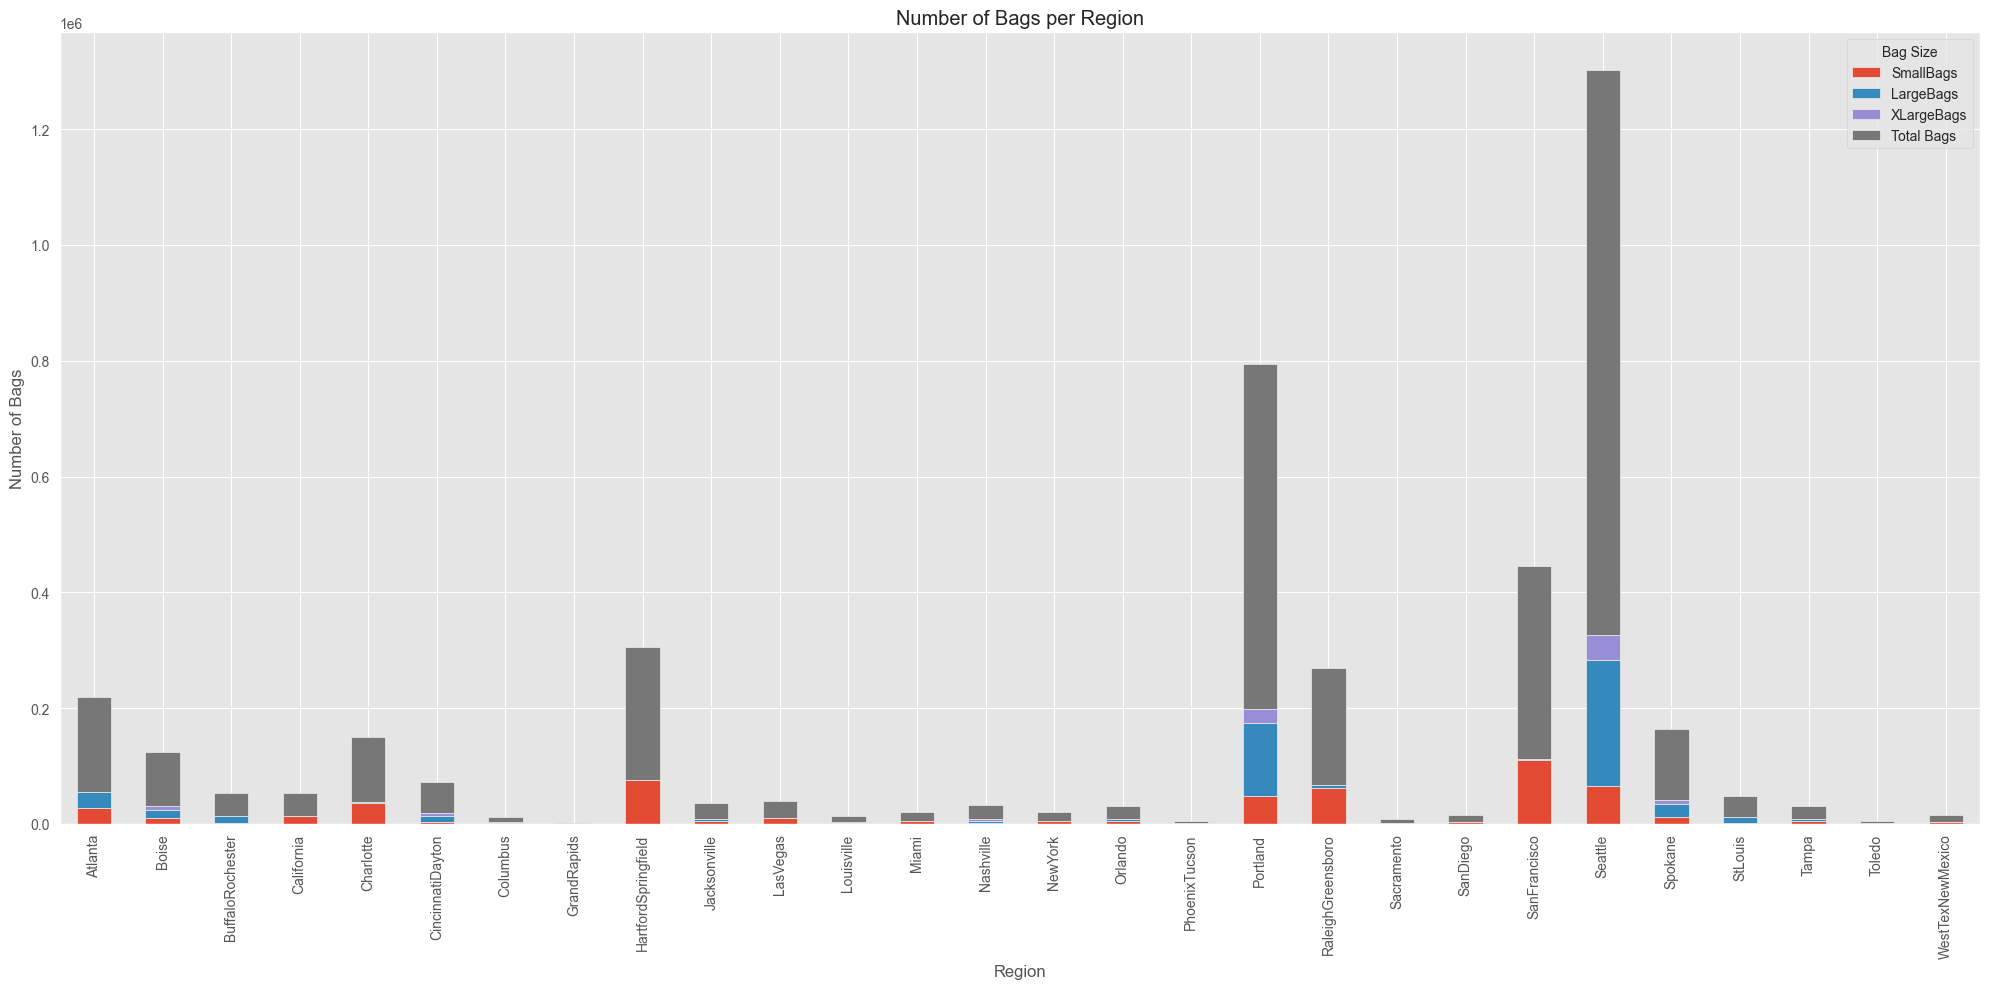

In [33]:
# Plotting the number of bags per region
plt.figure(figsize=(20, 10))
ax = bags_per_region.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Number of Bags per Region')
plt.xlabel('Region')
plt.ylabel('Number of Bags')
plt.legend(title='Bag Size')
plt.xticks(rotation=90, ha='center')  # Align x-axis labels to the center
plt.tight_layout()
plt.show()

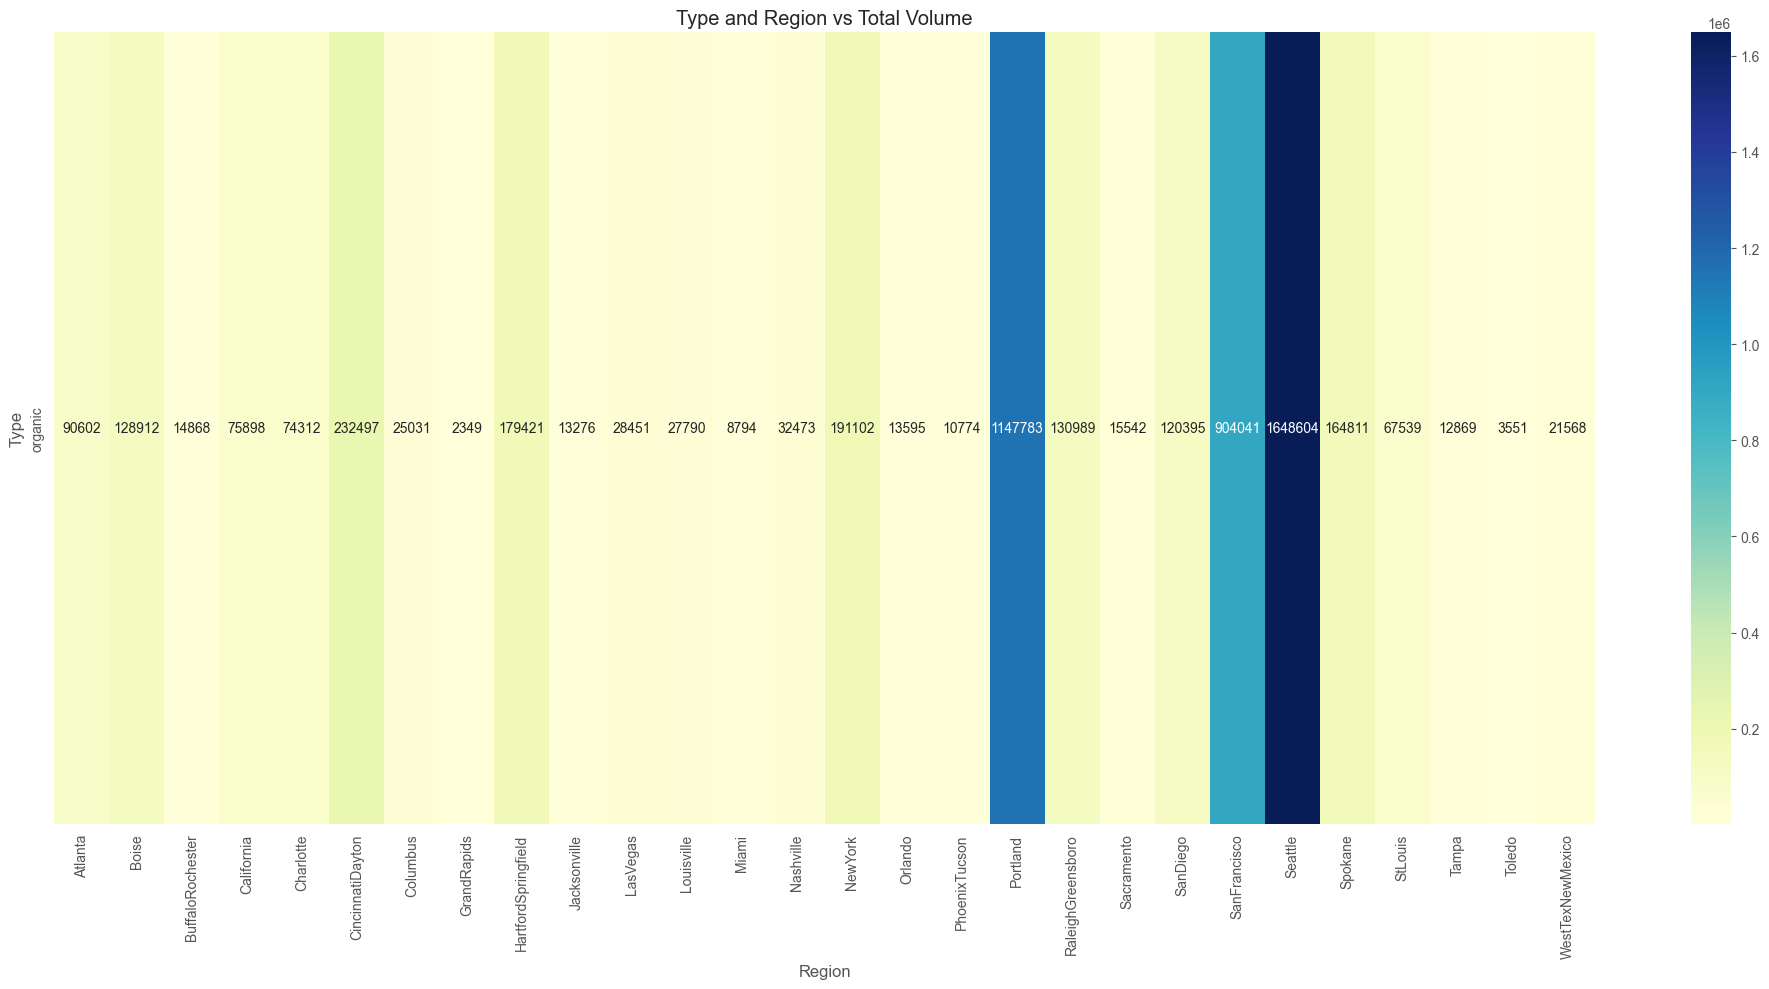

In [34]:
# Type and Region vs Total Volume
type_region_total_volume = avocado_data.groupby(['type', 'region'])['TotalVolume'].sum().unstack()

# Plotting Type and Region vs Total Volume
plt.figure(figsize=(20, 10))
sns.heatmap(type_region_total_volume, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Type and Region vs Total Volume')
plt.xlabel('Region')
plt.ylabel('Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

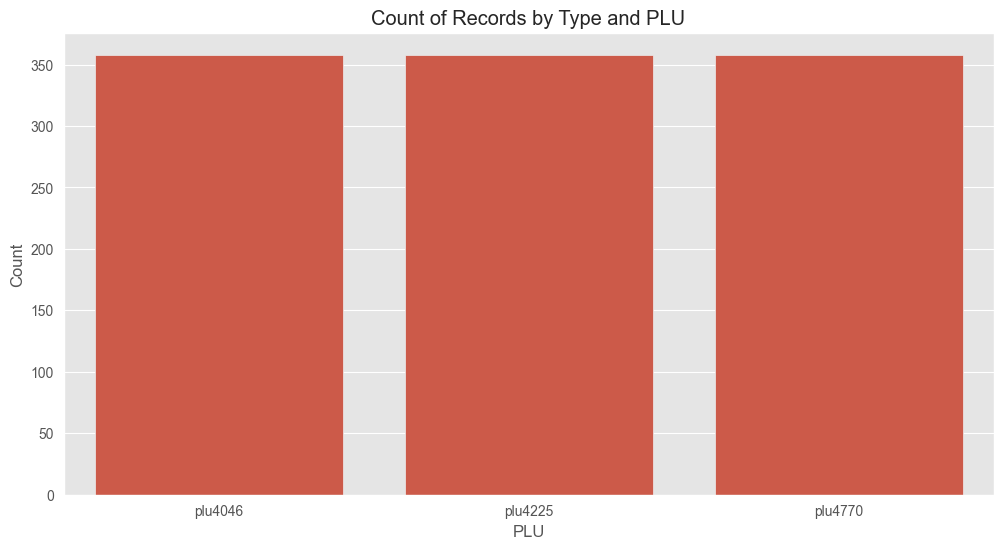

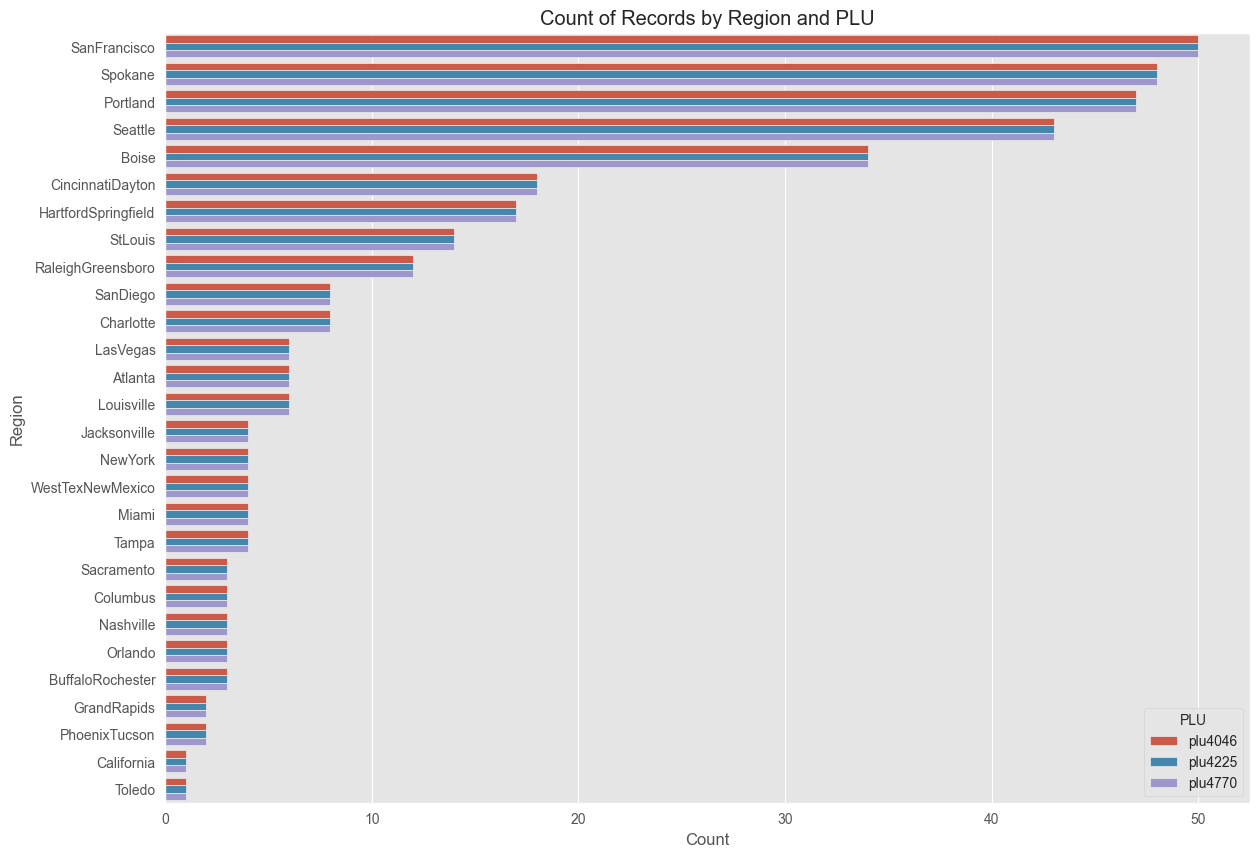

In [42]:
# Filter the dataset for the specified columns
plu_columns = ['plu4046', 'plu4225', 'plu4770']
filtered_data = avocado_data[plu_columns]

# Melt the dataframe to have a long format suitable for seaborn
melted_data = filtered_data.melt(var_name='PLU', value_name='Count')

# Plotting the count of records by Type and PLU
plt.figure(figsize=(12, 6))
sns.countplot(x='PLU', data=melted_data, order=plu_columns)
plt.title('Count of Records by Type and PLU')
plt.xlabel('PLU')
plt.ylabel('Count')
plt.show()

# Since the region information is not available in the filtered data, we need to include it
# Filter the dataset for the specified columns and include the region
filtered_data_with_region = avocado_data[['region'] + plu_columns]

# Melt the dataframe to have a long format suitable for seaborn
melted_data_with_region = filtered_data_with_region.melt(id_vars='region', var_name='PLU', value_name='Count')

# Plotting the count of records by Region and PLU
plt.figure(figsize=(14, 10))
sns.countplot(y='region', hue='PLU', data=melted_data_with_region, order=avocado_data['region'].value_counts().index)
plt.title('Count of Records by Region and PLU')
plt.xlabel('Count')
plt.ylabel('Region')
plt.legend(title='PLU')
plt.show()